# Question : Use IRIS dataset from Sklearn and perform KNN. Compare with logistic regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
iris = datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
X = iris.data
y = iris.target
print(X.shape, y.shape)

(150, 4) (150,)


In [4]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=49)

In [5]:
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


In [6]:
print(y_train.shape, y_test.shape)

(120,) (30,)


In [7]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [8]:
scaled_train_x = scaler.fit_transform(X_train)
scaled_test_x = scaler.fit_transform(X_test)

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_train_x, y_train)

KNeighborsClassifier()

In [10]:
ypred = knn.predict(scaled_test_x)

In [11]:
accuracy_score(y_test,ypred)

0.9333333333333333

In [14]:
xt = confusion_matrix(y_test, ypred)
xt

array([[ 8,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 10]], dtype=int64)

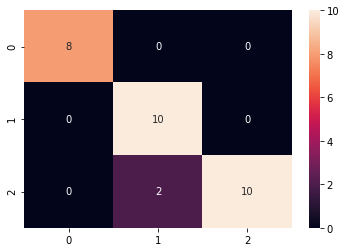

In [15]:
sns.heatmap(cm, annot=True)
plt.show()

In [16]:
log_reg = LogisticRegression()
log_reg.fit(scaled_train_x,y_train)

LogisticRegression()

In [17]:
ypred1 = log_reg.predict(scaled_test_x)

In [18]:
accuracy_score(y_test, ypred1)

0.9333333333333333

In [19]:
cm1 = confusion_matrix(y_test, ypred1)
cm1

array([[ 8,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 10]], dtype=int64)

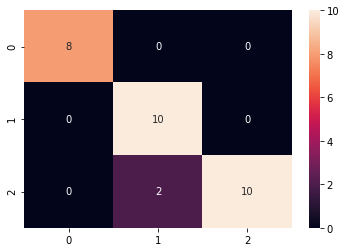

In [20]:
sns.heatmap(cm1, annot=True)
plt.show()